## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [98]:
# -- ВАШ КОД ТУТ --
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # метрика Силуэтта
from sklearn.metrics.cluster import adjusted_mutual_info_score # метрика AMI
from sklearn.metrics.pairwise import euclidean_distances # метрика эвклидово расстояние

In [106]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [107]:
X

array([[ 0.87603609,  0.62413841],
       [-0.59721916, -0.59190989],
       [ 0.51495945, -0.30713853],
       [ 0.7034278 ,  0.28387307],
       [-1.58380208,  0.47433936],
       [-1.89264212, -1.27703905],
       [-1.02176144, -0.38446059],
       [-0.62827134, -2.30814935],
       [-0.71809158,  1.18055509],
       [ 1.3326625 ,  1.50041396],
       [-1.54314377, -1.41637914],
       [ 1.36973405,  0.08368168],
       [ 0.0221037 , -1.12794789],
       [-0.77765189, -0.41575325],
       [ 0.15878937,  0.79493996],
       [-1.20735773, -1.13085237],
       [-1.25958985, -0.44891921],
       [ 1.16168447, -0.22904005],
       [-0.83545665,  0.0704683 ],
       [ 2.08364608,  0.57341134],
       [ 1.33131197,  1.00815304],
       [ 0.76205687,  0.419355  ],
       [-0.77700391, -1.10004302],
       [-1.17619766, -0.11516798],
       [ 1.61888431, -0.81956962],
       [-1.26810263,  0.58652856],
       [ 1.04546445,  0.10600911],
       [ 0.78972191, -0.44199715],
       [ 0.97669487,

In [109]:
for i in range(2, 5):
    print("n_clusters = %d" % i)
    model = KMeans(n_clusters= i).fit(X)
    score = silhouette_score(X, model.labels_)
    print("Качество кластеризации по метрике силуэтта %.3f" % score)
    score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')
    print("Качество кластеризации по метрике AMI %.3f" % score)

n_clusters = 2
Качество кластеризации по метрике силуэтта 0.447
Качество кластеризации по метрике AMI 0.929
n_clusters = 3
Качество кластеризации по метрике силуэтта 0.452
Качество кластеризации по метрике AMI 0.614
n_clusters = 4
Качество кластеризации по метрике силуэтта 0.443
Качество кластеризации по метрике AMI 0.584


In [42]:
model = KMeans(n_clusters=4).fit(X)

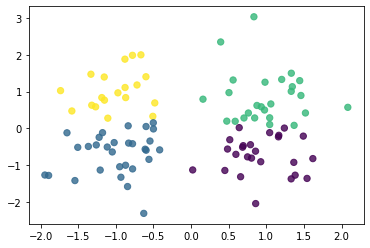

In [43]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=model.labels_, marker='o', alpha=0.8)
plt.show()

In [44]:
score = silhouette_score(X, model.labels_)

print("Качество кластеризации по метрике силуэтта %.3f" % score)

Качество кластеризации по метрике силуэтта 0.442


In [31]:
# метрика ухудшилась, лучше 2 кластера


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [32]:
# -- ВАШ КОД ТУТ --
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.582


In [33]:
# метрика ухудшилась, лучше 2 кластера


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

## 1

In [52]:
df = pd.read_csv('7.10_clustering_hw.csv')
df.head()

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1


In [67]:
X = df[['x1','x2']].values
Y = df['y'].values
X, Y

(array([[ 6.22134340e+00,  4.96875257e+00],
        [ 7.36089211e+00,  8.85745517e+00],
        [-1.08177799e-01,  4.73072345e+00],
        [ 3.12735827e+00,  1.92798607e+00],
        [-8.17259333e-01,  6.75997401e+00],
        [-4.53953063e-01,  5.13148343e+00],
        [ 1.86343462e-01,  5.41642130e+00],
        [ 3.02666005e-01,  4.54470960e+00],
        [ 1.77307347e+00,  5.43644781e+00],
        [-2.01194999e-01,  6.36651577e+00],
        [ 7.53677894e+00,  6.80970021e+00],
        [ 2.20731177e+00,  3.45620756e+00],
        [-2.88797561e-01,  5.14658347e+00],
        [-9.16017813e-01,  6.80423821e+00],
        [ 3.16354043e-01,  3.92677632e+00],
        [ 3.89160565e+00,  2.60897948e+00],
        [ 4.08313985e+00,  4.35087130e+00],
        [-8.28687021e-02,  5.44073623e+00],
        [ 3.89736756e+00,  2.78988611e+00],
        [ 8.17438634e-01,  5.88162649e+00],
        [ 7.18583278e+00,  7.54925513e+00],
        [ 3.15082847e+00,  2.07989415e+00],
        [ 1.28227087e+00,  4.615

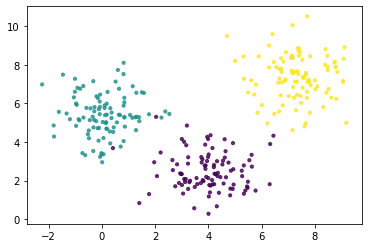

In [69]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=Y, marker='o', alpha=0.8)
plt.show()

In [71]:
# -- ВАШ КОД ТУТ --
metrics = []
MAX_CLUSTERS = 10
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters = cluster_num, random_state = 17).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 1105.897378110108
cluster_num 2, metric 663.5712032768099
cluster_num 3, metric 374.6589714184063
cluster_num 4, metric 348.17052724059585
cluster_num 5, metric 322.4572749177012
cluster_num 6, metric 302.0978866178218
cluster_num 7, metric 282.63616559680344
cluster_num 8, metric 265.5996867886235
cluster_num 9, metric 247.7083805018971


best cluster num: 3


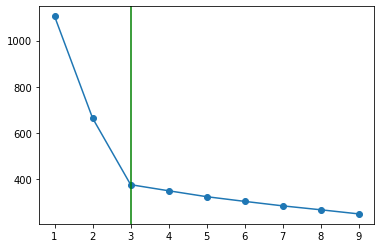

In [95]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics, marker = 'o')
plt.axvline(x = np.argmin(D)+1, c = 'g')
plt.show()

## 2

In [75]:
n = np.argmin(D)+1
n

3

In [76]:
kmeans_model = KMeans(n_clusters = n, random_state = 17).fit(X)

## 3

In [90]:
print('точка (5, 8) принадлежит кластеру ', kmeans_model.predict([[5, 8]])[0])
print('точка (0, 5) принадлежит кластеру ', kmeans_model.predict([[0, 5]])[0])

точка (5, 8) принадлежит кластеру  0
точка (0, 5) принадлежит кластеру  1


In [92]:
kmeans_model.predict([[5, 8]])[0] == kmeans_model.predict([[0, 5]])[0]
# принадлежит к разным классам

False

## 4

In [93]:
score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.970


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)